<a href="https://colab.research.google.com/github/ezikon/bootcamp_machine_learning_igti/blob/master/An%C3%A1lise_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


6


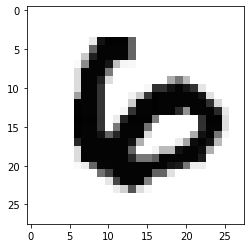

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 9000 # Selecionando uma imagem qualquer
print(y_train[image_index]) # y_train, y_test contém os labels de 0 a 9
plt.imshow(x_train[image_index], cmap='Greys')

In [6]:
x_train.shape

(60000, 28, 28)

In [8]:
# Fazendo o reshape para 4 dimensões, pois é um requisito da API do Keras (nosso
# array tem 3 dimensões)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Conversão para tipo float para obtermos casas decimais após
# a divisão

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizando os códigos RGB dividindo-os ao valor RGB máximo

x_train /= 255
x_test /= 255
print('x_train shape: ', x_train.shape)
print('Número de imagens em x_train: ', x_train.shape[0])
print('Número de imagens em x_test: ', x_test.shape[0])

x_train shape:  (60000, 28, 28, 1)
Número de imagens em x_train:  60000
Número de imagens em x_test:  10000


In [9]:
# Importando os módulos Keras contendo os modelos e camadas

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Instanciando o Sequential Model e adicionando as camadas

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [12]:
# Compilando e fazendo o fit do modelo

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 37s 614us/step - loss: 0.2147 - accuracy: 0.9358
Epoch 2/10
60000/60000 [==============================] - 37s 611us/step - loss: 0.0855 - accuracy: 0.9736
Epoch 3/10
60000/60000 [==============================] - 36s 606us/step - loss: 0.0602 - accuracy: 0.9806
Epoch 4/10
60000/60000 [==============================] - 37s 610us/step - loss: 0.0455 - accuracy: 0.9851
Epoch 5/10
60000/60000 [==============================] - 37s 611us/step - loss: 0.0351 - accuracy: 0.9884
Epoch 6/10
60000/60000 [==============================] - 37s 611us/step - loss: 0.0295 - accuracy: 0.9899
Epoch 7/10
60000/60000 [==============================] - 37s 618us/step - loss: 0.0255 - accuracy: 0.9911
Epoch 8/10
60000/60000 [==============================] - 38s 629us/step - loss: 0.0227 - accuracy: 0.9923
Epoch 9/10
60000/60000 [==============================] - 38s 631us/step - loss: 0.0220 - accuracy: 0.9923
Epoch 10/10
60000/60000 [============

In [13]:
# Avaliando o modelo

model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 203us/step


[0.057688510052273156, 0.9857000112533569]

6


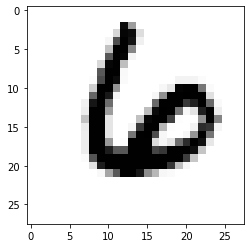

In [32]:
image_index = 6325
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())